In [ ]:
import nbsetup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from models.milky import MilkyWay

In [ ]:
milk = MilkyWay(20, 30, cp=nbsetup.cp)

Completed 8000


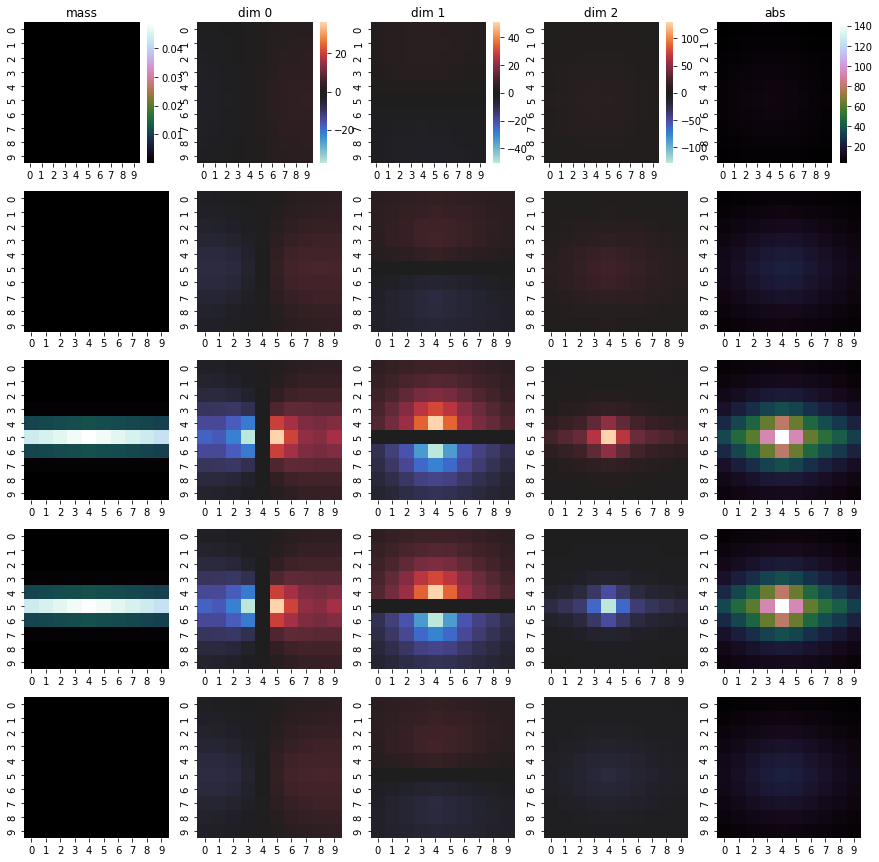

In [7]:
milk.rotate('x','z')
milk.heatmaps((0,milk.space.center[0],int(milk.space.center[0]/10)))

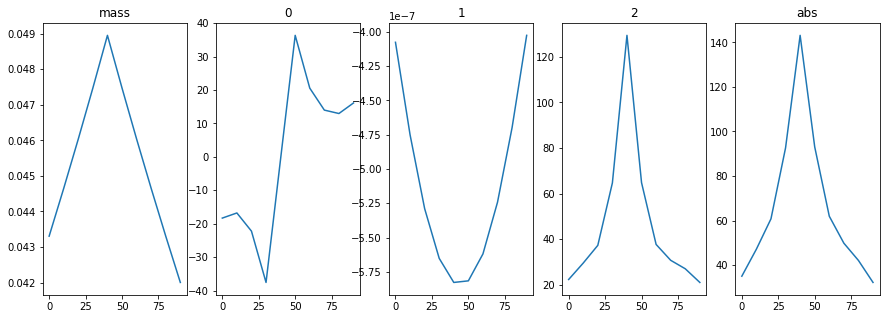

In [10]:
milk.lines(4,5)

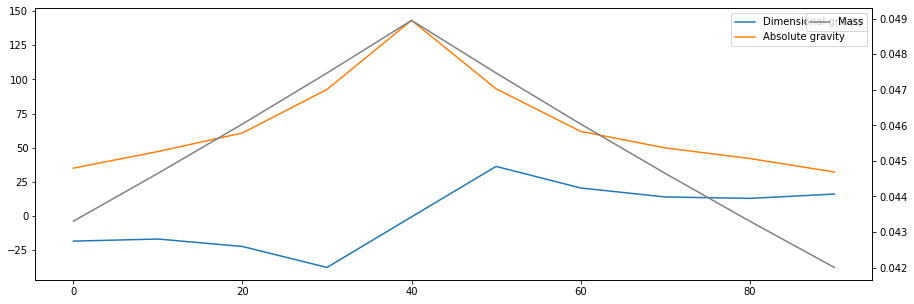

In [13]:
field(milk,4,5,0)